In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import tensorflow as tf

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.metrics import classification_report

In [6]:
from scipy.stats import skew

In [8]:
df=pd.read_csv('data.csv')

In [9]:
df.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,3433,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,7,MALAYSIA,0.0,17.82,NaN,31
1,4339,EPX,Travel Agency,Online,Cancellation Plan,0,85,SINGAPORE,69.0,0.00,NaN,36
2,34590,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,11,MALAYSIA,19.8,11.88,NaN,75
3,55816,EPX,Travel Agency,Online,2 way Comprehensive Plan,0,16,INDONESIA,20.0,0.00,NaN,32
4,13816,EPX,Travel Agency,Online,Cancellation Plan,0,10,"KOREA, REPUBLIC OF",15.0,0.00,NaN,29


In [10]:
df.shape

(50553, 12)

In [11]:
df.columns

Index(['ID', 'Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Claim', 'Duration', 'Destination', 'Net Sales', 'Commision (in value)',
       'Gender', 'Age'],
      dtype='object')

In [12]:
df.rename(columns={"Commision (in value)":'Commision'},inplace=True)

In [13]:
df.columns

Index(['ID', 'Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Claim', 'Duration', 'Destination', 'Net Sales', 'Commision', 'Gender',
       'Age'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50553 entries, 0 to 50552
Data columns (total 12 columns):
ID                      50553 non-null int64
Agency                  50553 non-null object
Agency Type             50553 non-null object
Distribution Channel    50553 non-null object
Product Name            50553 non-null object
Claim                   50553 non-null int64
Duration                50553 non-null int64
Destination             50553 non-null object
Net Sales               50553 non-null float64
Commision               50553 non-null float64
Gender                  14600 non-null object
Age                     50553 non-null int64
dtypes: float64(2), int64(4), object(6)
memory usage: 4.6+ MB


In [15]:
df.describe()

,ID,Claim,Duration,Net Sales,Commision,Age
count,50553.000000,50553.000000,50553.000000,50553.000000,50553.00000,50553.000000
mean,31679.740134,0.014658,49.425969,40.800977,9.83809,40.011236
std,18288.265350,0.120180,101.434647,48.899683,19.91004,14.076566
min,0.000000,0.000000,-2.000000,-389.000000,0.00000,0.000000
25%,15891.000000,0.000000,9.000000,18.000000,0.00000,35.000000
50%,31657.000000,0.000000,22.000000,26.500000,0.00000,36.000000
75%,47547.000000,0.000000,53.000000,48.000000,11.55000,44.000000
max,63325.000000,1.000000,4881.000000,810.000000,283.50000,118.000000


In [16]:
df.isnull().sum()

ID                          0
Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision                   0
Gender                  35953
Age                         0
dtype: int64

In [17]:
(df.isnull().sum()/df.shape[0])*100

ID                       0.000000
Agency                   0.000000
Agency Type              0.000000
Distribution Channel     0.000000
Product Name             0.000000
Claim                    0.000000
Duration                 0.000000
Destination              0.000000
Net Sales                0.000000
Commision                0.000000
Gender                  71.119419
Age                      0.000000
dtype: float64

In [18]:
#1 handle null values

In [19]:
df.drop(['ID','Gender'],axis=1,inplace=True)

In [20]:
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision,Age
0,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,7,MALAYSIA,0.0,17.82,31
1,EPX,Travel Agency,Online,Cancellation Plan,0,85,SINGAPORE,69.0,0.00,36
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,11,MALAYSIA,19.8,11.88,75
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,0,16,INDONESIA,20.0,0.00,32
4,EPX,Travel Agency,Online,Cancellation Plan,0,10,"KOREA, REPUBLIC OF",15.0,0.00,29


In [21]:
df.describe()

,Claim,Duration,Net Sales,Commision,Age
count,50553.000000,50553.000000,50553.000000,50553.00000,50553.000000
mean,0.014658,49.425969,40.800977,9.83809,40.011236
std,0.120180,101.434647,48.899683,19.91004,14.076566
min,0.000000,-2.000000,-389.000000,0.00000,0.000000
25%,0.000000,9.000000,18.000000,0.00000,35.000000
50%,0.000000,22.000000,26.500000,0.00000,36.000000
75%,0.000000,53.000000,48.000000,11.55000,44.000000
max,1.000000,4881.000000,810.000000,283.50000,118.000000


In [22]:
df['Duration'].median()  #+ve

22.0

In [23]:
df['Net Sales'].median() #+ve

26.5

In [24]:
df['Commision'].median() #+ve

0.0

In [25]:
df['Age'].median() #+ve

36.0

In [26]:
df[df['Age']>100]

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision,Age
90,JWT,Airlines,Online,Value Plan,0,58,INDIA,78.0,31.20,118
108,JWT,Airlines,Online,Value Plan,0,15,INDIA,31.0,12.40,118
140,JWT,Airlines,Online,Value Plan,0,8,INDIA,39.0,15.60,118
153,JWT,Airlines,Online,Value Plan,0,4,INDIA,78.0,31.20,118
181,JWT,Airlines,Online,Value Plan,0,0,INDIA,31.0,12.40,118
...,...,...,...,...,...,...,...,...,...,...
50158,JWT,Airlines,Online,Value Plan,0,41,INDIA,60.0,24.00,118
50179,JWT,Airlines,Online,Value Plan,0,62,INDIA,31.0,12.40,118
50250,JWT,Airlines,Online,Value Plan,0,15,INDIA,31.0,12.40,118
50429,JZI,Airlines,Online,Basic Plan,0,19,SRI LANKA,35.0,12.25,118


In [27]:
df['Age']=df['Age'].replace(118,99)

In [28]:
df[df['Duration']<0]

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision,Age
4063,JZI,Airlines,Online,Basic Plan,0,-1,BRUNEI DARUSSALAM,18.0,6.3,99
38935,JZI,Airlines,Online,Basic Plan,0,-1,INDONESIA,18.0,6.3,99
48367,JZI,Airlines,Online,Basic Plan,0,-2,BANGLADESH,22.0,7.7,99


In [29]:
df[df["Destination"] == "BRUNEI DARUSSALAM"]["Duration"].mean()

22.8130081300813

In [30]:
df[df["Destination"] == "INDONESIA"]["Duration"].mean()

31.55276381909548

In [31]:
df[df["Destination"] == "BANGLADESH"]["Duration"].mean()

13.975903614457831

In [32]:
df.loc[4063,"Duration"]=22.81

In [33]:
df.loc[38935,"Duration"]=31.55

In [34]:
df.loc[48367,"Duration"]=13.97

In [35]:
df[df['Duration']<0]

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision,Age


In [36]:
df_num=df.select_dtypes(['float64','int64'])

In [37]:
df_cat=df.select_dtypes(object)

In [38]:
df_num.head()

,Claim,Duration,Net Sales,Commision,Age
0,0,7.0,0.0,17.82,31
1,0,85.0,69.0,0.00,36
2,0,11.0,19.8,11.88,75
3,0,16.0,20.0,0.00,32
4,0,10.0,15.0,0.00,29


Duration


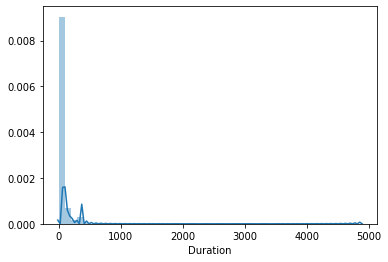

22.87238687706864
Net Sales


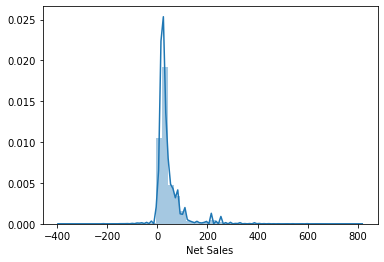

3.3281441910342053
Commision


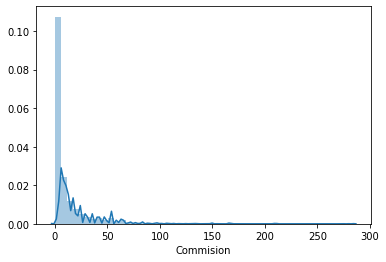

4.0780684356634636
Age


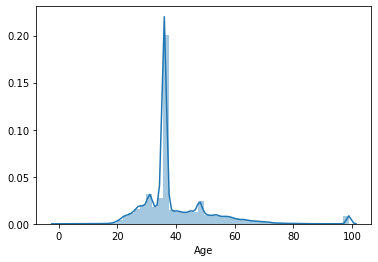

2.1407729096178785


In [39]:
for col in df_num:
    
    if col != "Claim":
        print(col)
        plt.figure()
        sns.distplot(df_num[col])
        plt.show() 
        print(skew(df_num[col]))

Duration


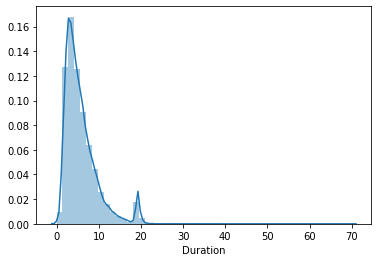

2.409521884196368
Commision


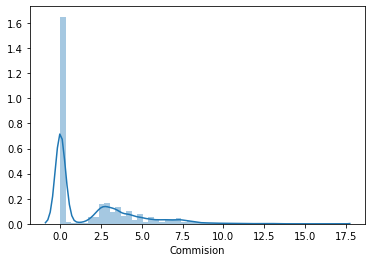

1.3513194369869304
Age


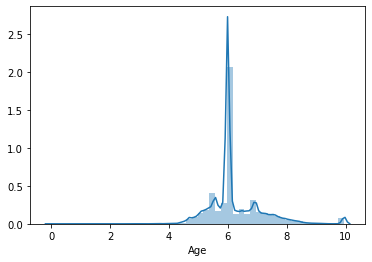

1.373058968031323


In [40]:
for col in df_num:
    if col != "Claim" and col != "Net Sales":
        print(col)
        df_num[col] = np.sqrt(df_num[col])
        plt.figure()
        sns.distplot(df_num[col])
        plt.show()
        print(skew(df_num[col]))

In [41]:
df_cat.head()

,Agency,Agency Type,Distribution Channel,Product Name,Destination
0,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,MALAYSIA
1,EPX,Travel Agency,Online,Cancellation Plan,SINGAPORE
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,MALAYSIA
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,INDONESIA
4,EPX,Travel Agency,Online,Cancellation Plan,"KOREA, REPUBLIC OF"


In [42]:
df_cat.drop(['Distribution Channel','Destination'],axis=1,inplace=True)

In [43]:
df_cat.head()

,Agency,Agency Type,Product Name
0,CWT,Travel Agency,Rental Vehicle Excess Insurance
1,EPX,Travel Agency,Cancellation Plan
2,CWT,Travel Agency,Rental Vehicle Excess Insurance
3,EPX,Travel Agency,2 way Comprehensive Plan
4,EPX,Travel Agency,Cancellation Plan


In [44]:
for col in df_cat:
    le=LabelEncoder()
    df_cat[col]=le.fit_transform(df_cat[col])

In [45]:
df_cat.head()

,Agency,Agency Type,Product Name
0,6,1,16
1,7,1,10
2,6,1,16
3,7,1,1
4,7,1,10


In [46]:
df_new=pd.concat([df_cat,df_num],axis=1)

In [47]:
df_new.head()

,Agency,Agency Type,Product Name,Claim,Duration,Net Sales,Commision,Age
0,6,1,16,0,2.645751,0.0,4.221374,5.567764
1,7,1,10,0,9.219544,69.0,0.000000,6.000000
2,6,1,16,0,3.316625,19.8,3.446738,8.660254
3,7,1,1,0,4.000000,20.0,0.000000,5.656854
4,7,1,10,0,3.162278,15.0,0.000000,5.385165


In [48]:
s=df_new['Duration']
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr
outliers1 = dict(s[(s < iqr_lower) | (s > iqr_upper)])

In [49]:
len(outliers1)

2568

In [50]:
a=list(outliers1.keys())
df_new.drop(a,inplace=True)

In [51]:
s=df_new['Net Sales']
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr
outliers2 = dict(s[(s < iqr_lower) | (s > iqr_upper)])

In [52]:
len(outliers2)

3795

In [53]:
b=list(outliers2.keys())
df_new.drop(b,inplace=True)

In [54]:
s=df_new['Commision']
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr
outliers3 = dict(s[(s < iqr_lower) | (s > iqr_upper)])

In [55]:
len(outliers3)

95

In [56]:
c=list(outliers3.keys())
df_new.drop(c,inplace=True)

In [57]:
s=df_new['Age']
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr
outliers4 = dict(s[(s < iqr_lower) | (s > iqr_upper)])

In [58]:
len(outliers4)

5461

In [59]:
d=list(outliers4.keys())
df_new.drop(d,inplace=True)

In [60]:
X=df_new.drop('Claim',axis=1)
Y=df_new['Claim']

In [61]:
X.head()

,Agency,Agency Type,Product Name,Duration,Net Sales,Commision,Age
0,6,1,16,2.645751,0.0,4.221374,5.567764
1,7,1,10,9.219544,69.0,0.000000,6.000000
3,7,1,1,4.000000,20.0,0.000000,5.656854
4,7,1,10,3.162278,15.0,0.000000,5.385165
5,6,1,16,8.000000,49.5,5.449771,6.000000


In [62]:
Y.head()

0    0
1    0
3    0
4    0
5    0
Name: Claim, dtype: int64

In [63]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [64]:
ss=StandardScaler()

In [65]:
X_train_ss=ss.fit_transform(X_train)
X_test_ss=ss.transform(X_test)

In [66]:
model=tf.keras.Sequential([
      tf.keras.layers.Dense(2, activation="relu", input_shape=(X.shape[1],)),
      tf.keras.layers.Dense(3, activation="relu"),
      tf.keras.layers.Dense(1, activation="sigmoid")
])

In [67]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 16        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 9         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 29
Trainable params: 29
Non-trainable params: 0
_________________________________________________________________


In [68]:
model.compile(optimizer='sgd',loss="binary_crossentropy")

In [69]:
train_model=model.fit(X_train_ss,Y_train,epochs=20)

Epoch 1/20
846/846 [==============================] - 3s 3ms/step - loss: 0.2995
Epoch 2/20
846/846 [==============================] - 2s 3ms/step - loss: 0.1183
Epoch 3/20
846/846 [==============================] - 2s 3ms/step - loss: 0.0866
Epoch 4/20
846/846 [==============================] - 2s 3ms/step - loss: 0.0745
Epoch 5/20
846/846 [==============================] - 2s 3ms/step - loss: 0.0685
Epoch 6/20
846/846 [==============================] - 2s 2ms/step - loss: 0.0650
Epoch 7/20
846/846 [==============================] - 2s 2ms/step - loss: 0.0629
Epoch 8/20
846/846 [==============================] - 2s 2ms/step - loss: 0.0614
Epoch 9/20
846/846 [==============================] - 2s 2ms/step - loss: 0.0605
Epoch 10/20
846/846 [==============================] - 2s 2ms/step - loss: 0.0597
Epoch 11/20
846/846 [==============================] - 2s 2ms/step - loss: 0.0592
Epoch 12/20
846/846 [==============================] - 2s 2ms/step - loss: 0.0588
Epoch 13/20
846/846 [====

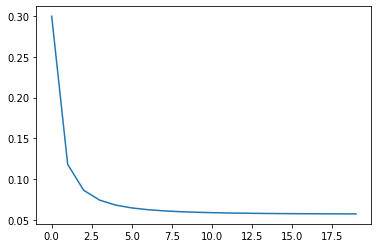

In [70]:
plt.plot(train_model.history['loss'])

In [71]:
Y_pred=model.predict(X_test_ss)

In [72]:
Y_pred=np.where(Y_pred >= 0.5,1,0)

In [73]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     11487
           1       0.00      0.00      0.00       104

    accuracy                           0.99     11591
   macro avg       0.50      0.50      0.50     11591
weighted avg       0.98      0.99      0.99     11591

